In [1]:
# ===============================
# 1️⃣ Importing Libraries
# ===============================
import pandas as pd                  # For data manipulation
import numpy as np                   # For numerical operations
import matplotlib.pyplot as plt      # For plotting
import seaborn as sns                # For advanced visualizations

# Set a clean visualization style
plt.style.use('seaborn-v0_8')


In [2]:
# ===============================
# 2️⃣ Loading the Dataset
# ===============================
# Replace 'ai_adoption_dataset.csv' with your actual file path
df = pd.read_csv("ai_adoption_dataset.csv")

# Check the first 5 rows to understand the data
print(df.head())

# Check dataset information: number of rows, columns, data types, missing values
print(df.info())

# Check for missing values in each column
print(df.isnull().sum())

# Basic statistical overview of numerical columns
print(df.describe())


     country        industry           ai_tool  adoption_rate  \
0        USA      Technology           ChatGPT          40.45   
1     France   Manufacturing        Midjourney          35.72   
2  Australia  Transportation           ChatGPT          13.47   
3         UK   Manufacturing           ChatGPT          48.46   
4         UK     Agriculture  Stable Diffusion          34.06   

   daily_active_users  year  \
0                2461  2023   
1                8496  2024   
2                8641  2024   
3                3488  2023   
4                1124  2024   

                                       user_feedback age_group company_size  
0  YyvLXOFyevRMSvJtkXodLvgejiqQNvSOZfeeJASDOVTxwm...     35-44      Startup  
1  AdFVhenjthYSKJNzxzfaGQk wLnjRCgrHTyfXQEFjFJCMO...     18-24   Enterprise  
2  zgNPmXBICRNbpjpTqIUWmMTeTYsInDNtAmzuxpDvcUZEAi...     45-54      Startup  
3  LxeKzQFbPvhxXUSgPVlLLJ pUFaicjCgiMtAmsTjovkrdE...     45-54   Enterprise  
4  IOQtQoSKdSmiXRsUKpjXjXZgQohym

In [3]:
# ===============================
# 3️⃣ Data Cleaning
# ===============================

# 3.1 Drop duplicate rows if any
df = df.drop_duplicates()

# 3.2 Handle missing values
# Fill numerical columns with median
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 3.3 Verify no missing values remain
print(df.isnull().sum())


country               0
industry              0
ai_tool               0
adoption_rate         0
daily_active_users    0
year                  0
user_feedback         0
age_group             0
company_size          0
dtype: int64


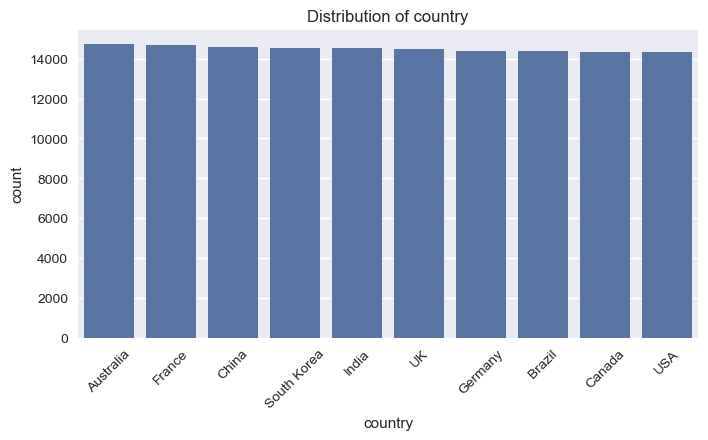

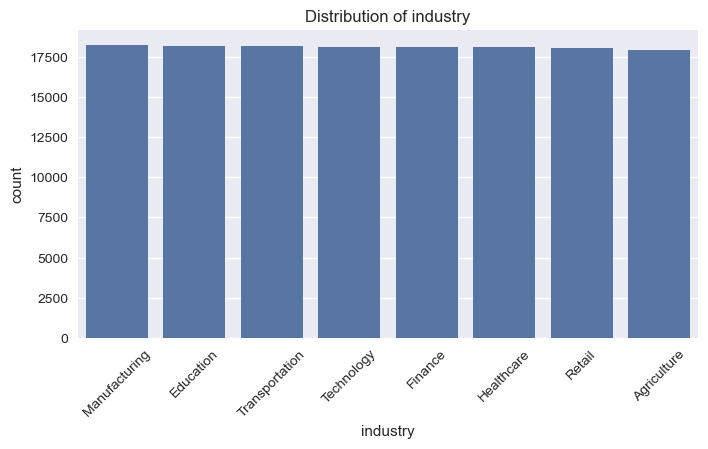

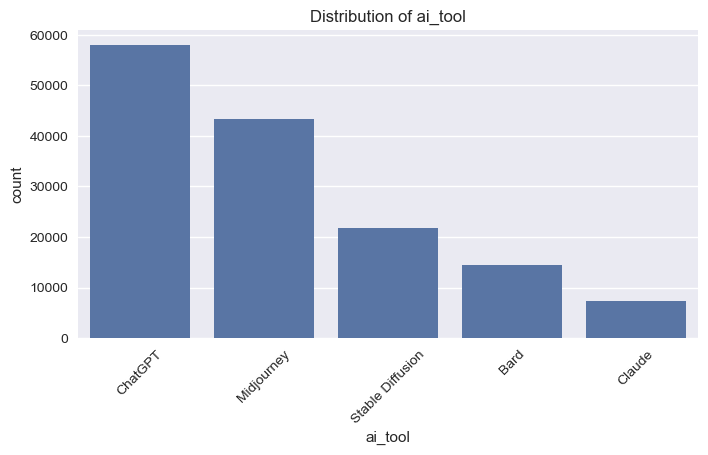

In [ ]:
# ===============================
# 4️⃣ Univariate Analysis
# ===============================
# Analyze categorical variables
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Analyze numerical variables
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of Numerical Columns")
plt.show()


In [ ]:
# ===============================
# 5️⃣ Bivariate Analysis
# ===============================

# 5.1 Correlation between numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

# 5.2 Example: AI Adoption Rate vs Industry
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Industry', y='Adoption_Rate', order=df.groupby('Industry')['Adoption_Rate'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.title('AI Adoption Rate by Industry')
plt.show()

# 5.3 Example: Popular AI Tool Count
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Popular_AI_Tool', order=df['Popular_AI_Tool'].value_counts().index)
plt.title('Most Popular AI Tools')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# ===============================
# 6️⃣ Insights & Summary
# ===============================

# Insight Examples:
# - Identify industries with highest AI adoption rates
# - Find which AI tools are most widely used
# - Determine sectors or regions with lower adoption → potential opportunities
# - Visualize correlations to understand key drivers of adoption

# You can also save a cleaned dataset for further analysis
df.to_csv("ai_adoption_cleaned.csv", index=False)


In [ ]:
# ===============================
# Pie Chart: Distribution of Popular AI Tools
# ===============================

# Explanation: This chart shows the percentage of companies using each AI tool.
# It helps identify which AI tools are most popular among industries.

plt.figure(figsize=(8,8))
df['Popular_AI_Tool'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Show percentage on the pie chart
    startangle=140,      # Start angle for first slice
    shadow=True          # Add shadow for better visualization
)
plt.title("Distribution of Popular AI Tools")
plt.ylabel("")  # Remove y-axis label for clean look
plt.show()


In [ ]:
# ===============================
# Box Plot: AI Adoption Rate by Industry
# ===============================

# Explanation: Box plot helps to see the spread of adoption rates in each industry.
# It also highlights outliers (industries with unusually high or low adoption rates).

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Industry', y='Adoption_Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.title("AI Adoption Rate by Industry (Box Plot)")
plt.show()


In [ ]:
# ===============================
# Scatter Plot: Adoption Rate vs Number of Employees
# ===============================

# Explanation: This scatter plot shows the relationship between company size and AI adoption rate.
# Hue is used to differentiate industries. Larger markers make data points more visible.

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Number_of_Employees',
    y='Adoption_Rate',
    hue='Industry',  # Color by industry
    s=100            # Marker size
)
plt.title("Adoption Rate vs Number of Employees")
plt.xlabel("Number of Employees")
plt.ylabel("AI Adoption Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)  # Place legend outside
plt.show()
